# Data preprocessing and Data splitting

In the previous step I was able to inspect the dataset and visualize images in general.

We know the distribution of 4 different classes in the 6400 MRIs dataset, more specifically, there are 3200 non demented and 3200 demented (any degree of dementia). MRIs of demented brains are more scarce ([Generative AI: a new approach to overcome data scarcity](https://hellofuture.orange.com/en/generative-ai-a-new-approach-to-overcome-data-scarcity/)) than healthy/non-demented brains, so we will focus on this group.

Lets remove non demented brain MRIs:

In [1]:
!rm -rf data/alzheimers_mri_dataset/train/NonDemented/
!rm -rf data/alzheimers_mri_dataset/test/NonDemented/

Lets import dependencies and define some global variables that we are going to use.

In [2]:
import os
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import glob
from PIL import Image, ImageOps
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
dataset_path = 'data/alzheimers_mri_dataset'
train_folder_path = f'{dataset_path}/train'
test_folder_path = f'{dataset_path}/test'

In [4]:
# Note: we know these are gray scale images, so we should directly show it like that,
# matplotlib would show images in rgb if we don't set it to gray scale.
    
def show_img_list(imgs_list, n_rows, n_cols, width, height):
    px = 10 / plt.rcParams['figure.dpi']
    fig = plt.figure(figsize=(width*px, height*px))
    grid = ImageGrid(fig, (1,1,1,1),
        nrows_ncols=(n_rows, n_cols),
        axes_pad=0.1,
    )

    for ax, _img in zip(grid, imgs_list):
        img = _img
        if isinstance(img, list):
            # show legend if possible
            img = _img[0]
            legend = _img[1]
            ax.text(4, 10, legend, fontsize=20, bbox={'facecolor': 'white', 'pad': 10})
        npimg = img.permute(1,2,0).numpy()
        ax.imshow(npimg, cmap='gray')

    plt.show()

We need to apply transformations to MRIs:

* Images by default are open in color, but we should open it in grayscale.
* MRIs are rectangular, we need to transform images to be a square for making training process easier.

In [5]:
default_image_size = 128

transform = transforms.Compose([
    # to grayscale
    transforms.Grayscale(num_output_channels=1),
    # zoom and crop a square 176x176
    transforms.CenterCrop(176),
    # resize to 128x128
    transforms.Resize(size=(default_image_size, default_image_size)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(train_folder_path, transform)

data_loader = torch.utils.data.DataLoader(dataset=dataset, shuffle=True)

In the previous cell we are defining transformers to:
* Preserve grayscale channels only.
* Define a centered square of 176 pixels and crop it.
* Resize the resulting 176x176 image to 128x128 image, which is going to make training more predictable when defining discriminator and generator layers outputs.
* We are also shuffling images (shuffle=True) in order to see the effect of transformers in all classes randomly.

Now lets see a set of resulting image:

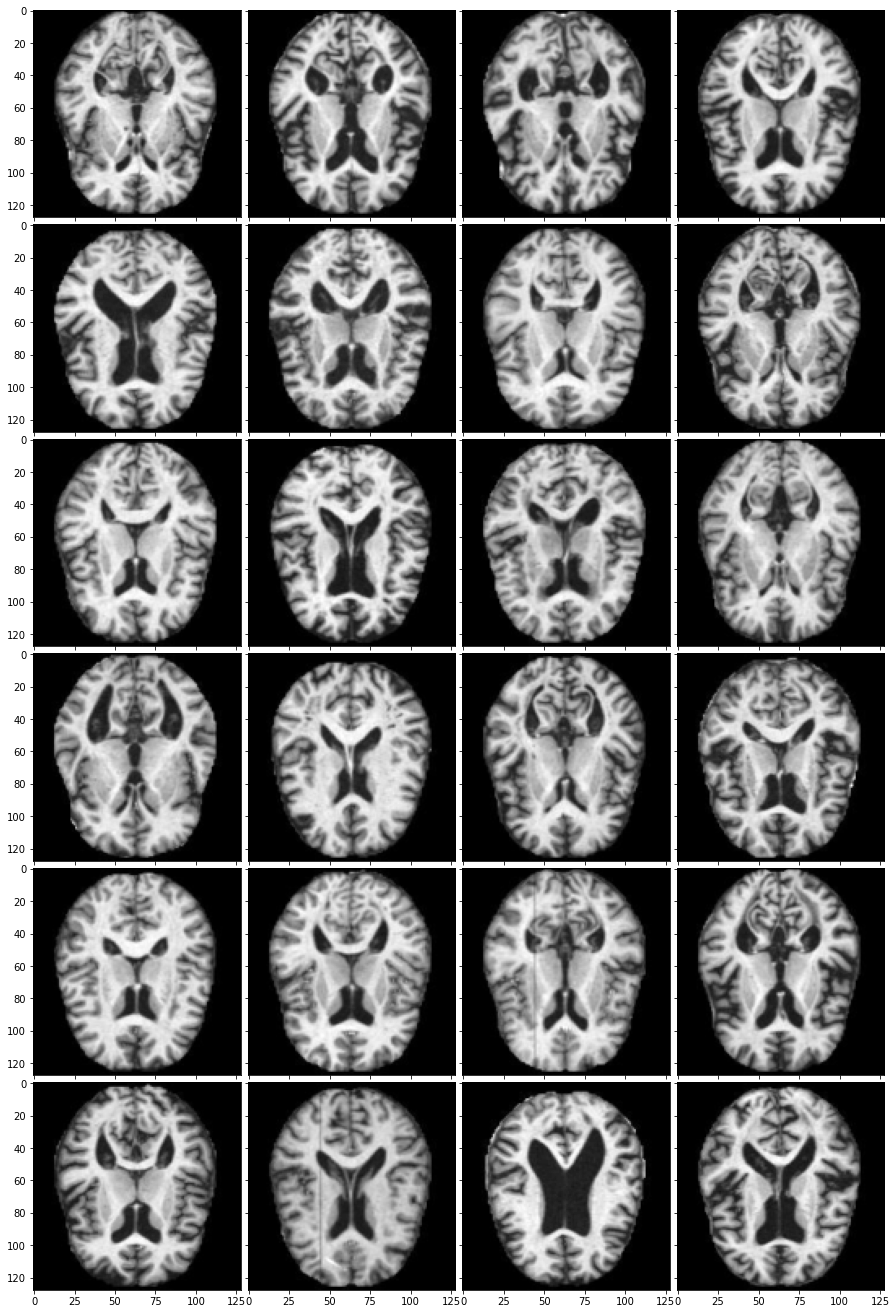

In [6]:
dataiter = iter(data_loader)

images = []
for n in np.arange(24):
    img, _ = dataiter.next()
    images.append(img[0])

show_img_list(images, 6, 4, default_image_size, default_image_size)

After all of this we can confirm that all brains are centered, and all brain matter is inside the resulting image, probably if we define a smaller square we would remove part of the brain matter in the image, so we can keep this size.